In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import seaborn as sns

In [33]:
paths = ["/scratch/buglakova/data/cryofib/segm_fibsem/F107/multicut_pipeline/F107_A1_em_pipeline_logs/features.csv", "/scratch/buglakova/data/cryofib/segm_fibsem/F107/multicut_pipeline/F107_A2_em_pipeline_tiling_logs/features.csv", "/scratch/buglakova/data/cryofib/segm_fibsem/F107/multicut_pipeline/F107_A3_em_pipeline_logs/features.csv"]
names = ["F107_A1", "F107_A2", "F107_A3"]

In [70]:
dfs = [pd.read_csv(fname) for fname in paths]
dfs = [df[df["area"] > 1e6] for df in dfs]

for name, df in zip(names, dfs):
    df["dataset"] = name
    df["nuclei_area"] = df["nuclei_area"] / 255
    df["nuclei_fraction"] = df["nuclei_area"] / df["area"]
    print(name, len(df))


dfs = [df[df["nuclei_area"] > 1e6] for df in dfs]
dfs = [df[df["cell_idx"] > 2] for df in dfs]

F107_A1 64
F107_A2 103
F107_A3 123


In [60]:
dfs[1]

,cell_idx,area,nuclei_area,dataset,nuclei_fraction
7,7,29842215.0,6950603.0,F107_A2,0.232912
8,8,60487574.0,6352714.0,F107_A2,0.105025
12,12,35001719.0,9407186.0,F107_A2,0.268764
15,15,61863035.0,14595195.0,F107_A2,0.235928
16,16,59370140.0,14845857.0,F107_A2,0.250056
17,17,63597174.0,18730503.0,F107_A2,0.294518
18,18,98163608.0,27678310.0,F107_A2,0.281961
19,19,27605761.0,8536845.0,F107_A2,0.309241
22,22,27063233.0,9646777.0,F107_A2,0.356453
23,23,15186511.0,3409887.0,F107_A2,0.224534


F107_A1 35
F107_A2 52
F107_A3 69


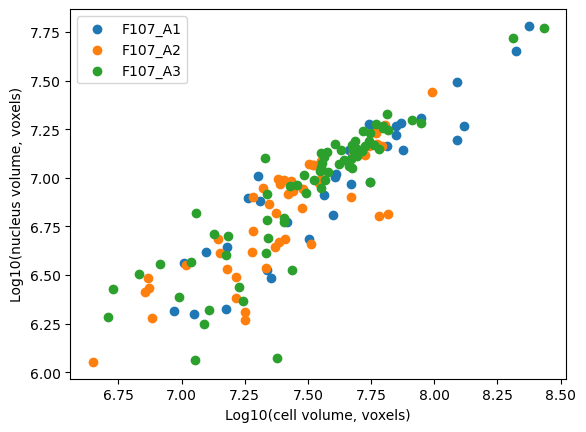

In [66]:
for name, df in zip(names, dfs):
    plt.scatter(np.log10(df["area"]), np.log10(df["nuclei_area"]), label=name)
    print(name, len(df))

plt.xlabel("Log10(cell volume, voxels)")   
plt.ylabel("Log10(nucleus volume, voxels)") 
plt.legend()

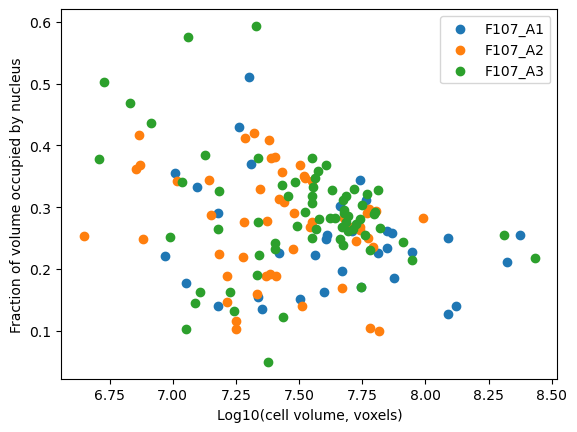

In [67]:
for name, df in zip(names, dfs):
    plt.scatter(np.log10(df["area"]), df["nuclei_fraction"], label=name)

plt.xlabel("Log10(cell volume, voxels)")   
plt.ylabel("Fraction of volume occupied by nucleus")     
plt.legend()

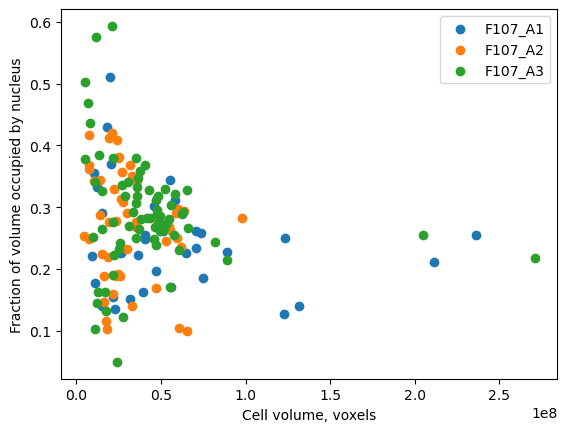

In [69]:
for name, df in zip(names, dfs):
    plt.scatter(df["area"], df["nuclei_fraction"], label=name)

plt.xlabel("Cell volume, voxels")   
plt.ylabel("Fraction of volume occupied by nucleus")     
plt.legend()